<a href="https://colab.research.google.com/github/satuelisa/AlphaBot/blob/master/towers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1142]:
rodCount = 3
diskCount = 5

In [1143]:
rods = [ [] for rod in range(rodCount) ]
rods

[[], [], []]

In [1144]:
disks = [ size for size in range(diskCount) ]
disks

[0, 1, 2, 3, 4]

In [1145]:
import seaborn as sns
colors = sns.color_palette('bright', diskCount)
colors

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215)]

In [1146]:
rods[0] = disks # put all disks on the first rod, listed from top to bottom

In [1147]:
def validate(rods):
  for rod in rods:
      previous = 0
      for disk in rod:
        if disk < previous:
          return False # a disk is smaller than the one above it
        previous = disk
  return True # all disks were larger than the ones above them

In [1148]:
validate(rods)

True

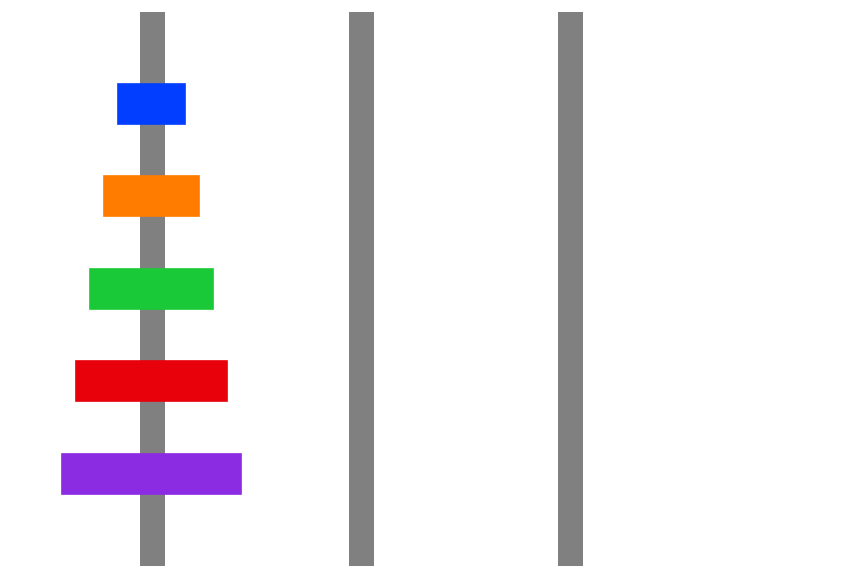

In [1149]:
import matplotlib.pyplot as plt

fig = None
ax = None

def setup():
  global fig, ax
  r = len(rods)
  d = max( [ max(rod) if len(rod) > 0 else 0 for rod in rods ] ) + 1
  if fig is None:
    fig = plt.figure(figsize = (3 * r, 1 + d), dpi = 120)
    ax = plt.subplot(111)
  plt.axis('off')
  plt.xlim(-2 * d, r * (2 * d) + 4 * d)
  plt.ylim(-1, d)

drawings = [] # will need this later to make an animation of the stages

def draw(configuration):
  global drawings
  r = len(configuration)
  d = max( [ max(rod) if len(rod) > 0 else 0 for rod in rods ] ) + 1
  x = 0
  for rod in configuration:
    h = 0
    ax.axvline(x, color = 'gray', linestyle = '-', lw = 5 * r) # bars for where the rods are
    for disk in rod[::-1]: # from bottom to top
      s = disk + 1 # the size 0 gets drawn with width 2, the size 1 with width 4 etc
      drawings.append(ax.plot([x - s, x + s], [h, h], color = colors[disk], linestyle = '-', lw = 5 * d)) # draw the disks
      h += 1
    x += 3 * d

setup()
draw(rods)
fig.show()

In [1150]:
counter = 0
track = [ [ r[:] for r in rods ] ]

def move(configuration, target = diskCount - 1, destination = rodCount - 1, store = True):
  global counter
  counter += 1
  source = None
  for r in range(len(configuration)):
    if target in configuration[r]:
      source = r # located the current rod
      break
  top = None
  for disk in configuration[source]:
    if disk == target:
      break
    if disk != target:
      top = disk
  auxiliary = None
  if top is not None: # something is on top of it
    # we have to move the one on top of it elsewhere
    # it cannot go on the source itself nor on the target rod
    for aux in range(len(configuration)):
      if aux == source or aux == destination:
        continue
      elif len(configuration[aux]) == 0 or rods[aux][0] > target: # any other rod that does not have smaller disks on top works
        auxiliary = aux
        break # done
    if auxiliary is None:
      print('we are unfortunately at an impasse') # this should not happen
      return
    else:
      move(configuration, top, auxiliary)
  assert configuration[source][0] == target # make sure it is now on top
  configuration[source].pop(0) # remove it
  configuration[destination].insert(0, target) # put it at the top of the target rod
  if store: # take a snapshot after every disk movement
    track.append([ r[:] for r in configuration ])
  assert validate(configuration) # make sure the current configuration is valid
  # put the other one back on it, if there was one there before
  if top is not None:
    move(configuration, top, destination)

In [1151]:
move(rods)

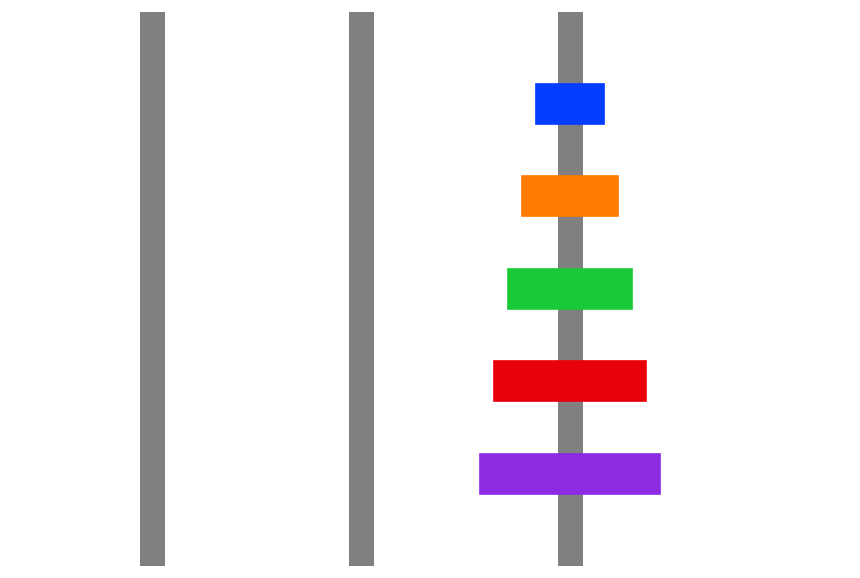

In [1152]:
def clear():
  # erase old disks, if any (needed when we animate later on)
  global drawings
  for old in drawings:
    bar = old.pop(0)
    bar.remove()
  drawings = []

clear() # clean out the original positions from the drawing
draw(rods) # draw the final positions
fig # see the outcome

In [1153]:
print(counter, len(track))
print(track[:3])
print(track[-3:])

31 32
[[[0, 1, 2, 3, 4], [], []], [[1, 2, 3, 4], [], [0]], [[2, 3, 4], [1], [0]]]
[[[0], [1], [2, 3, 4]], [[0], [], [1, 2, 3, 4]], [[], [], [0, 1, 2, 3, 4]]]


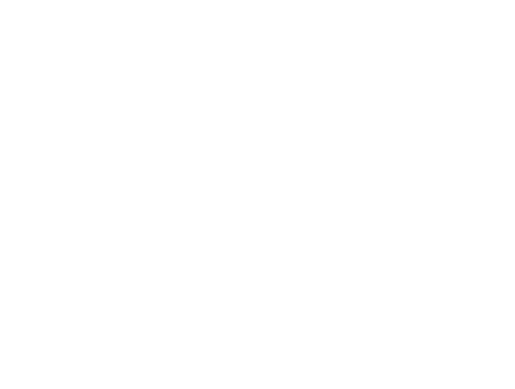

In [1154]:
from matplotlib import rc
rc('animation', html='jshtml')
import matplotlib.animation as animation

def step(t):
  clear() # clean up the old disks
  draw(track[t])

setup()
animation.FuncAnimation(fig, step, frames = len(track), interval = 500, repeat = False)